In [319]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt


In [320]:
df = pd.read_csv('/content/sample_data/weight-height knn.csv')

In [321]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [322]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Gender  Height  Weight
0      False   False   False
1      False   False   False
2      False   False   False
3      False   False   False
4      False   False   False
...      ...     ...     ...
8550   False   False   False
8551   False   False   False
8552   False   False   False
8553   False   False   False
8554   False   False   False

[8555 rows x 3 columns]>

**Encoding feature "Gender"**

In [323]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [324]:
df.Gender = le.fit_transform(df.Gender)
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [325]:
x = df[['Gender','Height']]
y = df['Weight']

In [326]:
x.head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


In [327]:
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

# **Now separate Data**

In [328]:
#Seperate x(Gender, Height) and y (y=Weight)
#Train = 70%, Test = 30%
from sklearn.model_selection import train_test_split as tts 
xtrain, xtest, ytrain, ytest = tts(x,y,test_size=.30)

In [329]:
xtrain.head()

,Gender,Height
8143,0,63.285107
3018,1,71.679295
8548,0,62.214923
1474,1,68.886895
7499,0,57.148198


In [330]:
ytrain.head()

8143    119.007461
3018    215.875149
8548    132.555193
1474    175.992018
7499     91.645473
Name: Weight, dtype: float64

# **Apply linear regression**

In [331]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

In [332]:
lreg.fit(xtrain,ytrain)

LinearRegression()

In [333]:
lreg.coef_

array([19.61191601,  5.98516244])

In [334]:
lreg.intercept_

-245.7358818517764

In [335]:
pred = lreg.predict(xtest)

In [336]:
pred

array([186.78037562, 136.78197693, 214.95669436, ..., 121.19867324,
       136.88866551, 142.46964353])

In [337]:
lreg.predict([[0,70.23]])

array([174.60207663])

In [338]:
df['Predicted_Result'] = lreg.predict(x)

In [339]:
df.head()

,Gender,Height,Weight,Predicted_Result
0,1,73.847017,241.893563,215.862427
1,1,68.781904,162.310473,185.546903
2,1,74.110105,212.740856,217.437054
3,1,71.730978,220.042470,203.197592
4,1,69.881796,206.349801,192.129934


In [340]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error (ytest,pred)
mse = mean_squared_error (ytest,pred)

In [341]:
mae

8.05443996501469

In [342]:
mse

108.34143264838339

In [343]:
lreg.score(xtest, ytest)

0.893111216749661

# **Apply K-NN Regressor**

In [344]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)

In [345]:
neigh.fit(xtest,ytest)

KNeighborsRegressor()

In [346]:
pred1 = neigh.predict(xtest)

In [347]:
pred1

array([196.2196136 , 136.76473718, 217.8616902 , ..., 116.23471892,
       140.41947036, 147.0544975 ])

In [348]:
df['Predicted_Result2'] = neigh.predict(x)

In [349]:
df.head()

,Gender,Height,Weight,Predicted_Result,Predicted_Result2
0,1,73.847017,241.893563,215.862427,218.248578
1,1,68.781904,162.310473,185.546903,180.164857
2,1,74.110105,212.740856,217.437054,213.393926
3,1,71.730978,220.042470,203.197592,197.786390
4,1,69.881796,206.349801,192.129934,193.730686


In [350]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae1 = mean_absolute_error (ytest,pred1)
mse1 = mean_squared_error (ytest,pred1)

In [351]:
mae1

7.237267867634593

In [352]:
mse1

86.54434259972513

In [353]:
neigh.score(xtest, ytest)

0.9146160499122481

# **Opinion**
K-NN Regressor algorithm is the best for this Dataset, Because MAE and MSE is less than Linear Regression and provide higher Accuracy.

#**Step-2**
#apply K-NN classifier


In [354]:
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve
import warnings as w
w.filterwarnings('ignore')

In [355]:
ds = pd.read_csv('/content/sample_data/Breast Cancer.csv')

In [356]:
ds.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [357]:
ds.drop(['id','Unnamed: 32'], axis=1, inplace= True)

In [358]:
ds.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [359]:
x = ds.drop(['diagnosis'], axis=1)

In [360]:
y = ds[['diagnosis']]

In [361]:
#Seperate x() and y (y='diagnosis')
#Train = 70%, Test = 30%
from sklearn.model_selection import train_test_split as tts 
x_train, x_test, y_train, y_test = tts(x,y,test_size=.30)

In [362]:
x_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
199,14.450,20.22,94.49,642.7,0.09872,0.12060,0.118000,0.059800,0.1950,0.06466,...,18.33,30.12,117.90,1044.0,0.1552,0.40560,0.49670,0.18380,0.4753,0.10130
101,6.981,13.43,43.79,143.5,0.11700,0.07568,0.000000,0.000000,0.1930,0.07818,...,7.93,19.54,50.41,185.2,0.1584,0.12020,0.00000,0.00000,0.2932,0.09382
334,12.300,19.02,77.88,464.4,0.08313,0.04202,0.007756,0.008535,0.1539,0.05945,...,13.35,28.46,84.53,544.3,0.1222,0.09052,0.03619,0.03983,0.2554,0.07207
310,11.700,19.11,74.33,418.7,0.08814,0.05253,0.015830,0.011480,0.1936,0.06128,...,12.61,26.55,80.92,483.1,0.1223,0.10870,0.07915,0.05741,0.3487,0.06958
278,13.590,17.84,86.24,572.3,0.07948,0.04052,0.019970,0.012380,0.1573,0.05520,...,15.50,26.10,98.91,739.1,0.1050,0.07622,0.10600,0.05185,0.2335,0.06263


In [363]:
y_train.head()

,diagnosis
199,M
101,B
334,B
310,B
278,B


In [364]:
#std scalling
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [365]:
x_train_scl = std.fit_transform(x_train)
x_test_scl = std.fit_transform(x_test)

In [366]:
x_train_scl

array([[ 0.08953499,  0.23507338,  0.10129809, ...,  1.06724857,
         3.25938112,  0.96706071],
       [-1.95938893, -1.29912855, -1.92027564, ..., -1.71910114,
         0.10370194,  0.55549175],
       [-0.50026102, -0.03606688, -0.56099658, ..., -1.11529097,
        -0.55134843, -0.64124957],
       ...,
       [-1.51032099, -1.6696869 , -1.49961286, ..., -1.04919476,
         0.60278794,  0.35961133],
       [-0.61273375,  0.44972608, -0.62040772, ..., -0.46645655,
         0.351512  , -0.56201704],
       [ 0.55039885,  0.33901047,  0.64397301, ...,  1.42350111,
         1.44499556,  1.67685211]])

In [367]:
#apply K-NN classifier
from sklearn.neighbors import KNeighborsClassifier
k_neigh = KNeighborsClassifier(n_neighbors=5)
k_neigh.fit(x_train_scl, y_train)

KNeighborsClassifier()

In [368]:
k_pred =k_neigh.predict(x_test_scl)

In [369]:
k_pred

array(['B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B',
       'B', 'B'], dtype=object)

In [370]:
ds['predicted_result'] =k_neigh.predict(x)

In [371]:
ds

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,predicted_result
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


In [372]:
#from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve

classification_report(y_test, k_pred)

'              precision    recall  f1-score   support\n\n           B       0.93      0.98      0.96        98\n           M       0.97      0.90      0.94        73\n\n    accuracy                           0.95       171\n   macro avg       0.95      0.94      0.95       171\nweighted avg       0.95      0.95      0.95       171\n'

In [373]:
print (classification_report(y_test, k_pred))

              precision    recall  f1-score   support

           B       0.93      0.98      0.96        98
           M       0.97      0.90      0.94        73

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [374]:
cm = confusion_matrix(y_test,k_pred)

In [375]:
cm

array([[96,  2],
       [ 7, 66]])

Text(0.5, 1.0, 'Confusion Matrix')

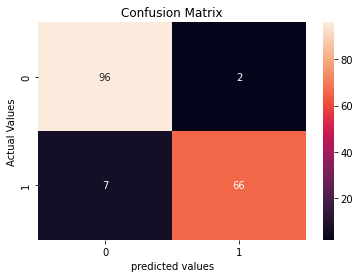

In [376]:
sns.heatmap(cm, annot=True)
plt.xlabel('predicted values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')

In [377]:
k_neigh.score(x_test_scl, y_test)

0.9473684210526315

# **ROC Curve**

In [378]:
from sklearn.metrics import plot_roc_curve

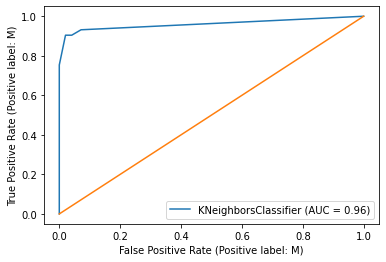

In [379]:
plot_roc_curve(k_neigh, x_test_scl, y_test)
plt.plot([0,1],[0,1])

In [380]:
k_neigh.score(x_test_scl, y_test)

0.9473684210526315

In [402]:
from numpy.ma.core import reshape
tp, fn, tn, fp =  confusion_matrix(y_test, k_pred).reshape(-1)

In [403]:
Accuracy = (tp+tn)/(tp+fp+tn+fn)

In [404]:
Accuracy

0.6023391812865497

# **Decision tree**

In [381]:
from sklearn import tree
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [382]:
clf.fit(x_train_scl,y_train)

DecisionTreeClassifier()

In [383]:
dt_pred = clf.predict(x_test_scl)
dt_pred

array(['B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B',
       'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B'], dtype=object)

[Text(0.6029411764705882, 0.9375, 'X[22] <= 0.208\ngini = 0.455\nsamples = 398\nvalue = [259, 139]'),
 Text(0.4411764705882353, 0.8125, 'X[27] <= 0.711\ngini = 0.146\nsamples = 277\nvalue = [255, 22]'),
 Text(0.29411764705882354, 0.6875, 'X[22] <= 0.015\ngini = 0.08\nsamples = 264\nvalue = [253, 11]'),
 Text(0.17647058823529413, 0.5625, 'X[29] <= -1.574\ngini = 0.025\nsamples = 241\nvalue = [238, 3]'),
 Text(0.11764705882352941, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.23529411764705882, 0.4375, 'X[24] <= 2.582\ngini = 0.017\nsamples = 240\nvalue = [238, 2]'),
 Text(0.17647058823529413, 0.3125, 'X[9] <= -1.229\ngini = 0.008\nsamples = 239\nvalue = [238, 1]'),
 Text(0.11764705882352941, 0.1875, 'X[17] <= 0.204\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.058823529411764705, 0.0625, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.17647058823529413, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.23529411764705882, 0.1875, 'gini = 0.0\nsamples =

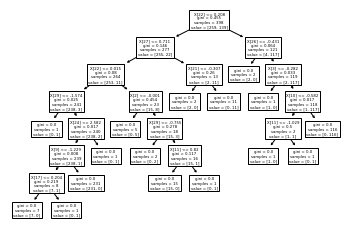

In [384]:
tree.plot_tree(clf)


[Text(0.6029411764705882, 0.9375, 'perimeter_worst <= 0.208\ngini = 0.455\nsamples = 398\nvalue = [259, 139]'),
 Text(0.4411764705882353, 0.8125, 'concave points_worst <= 0.711\ngini = 0.146\nsamples = 277\nvalue = [255, 22]'),
 Text(0.29411764705882354, 0.6875, 'perimeter_worst <= 0.015\ngini = 0.08\nsamples = 264\nvalue = [253, 11]'),
 Text(0.17647058823529413, 0.5625, 'fractal_dimension_worst <= -1.574\ngini = 0.025\nsamples = 241\nvalue = [238, 3]'),
 Text(0.11764705882352941, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.23529411764705882, 0.4375, 'smoothness_worst <= 2.582\ngini = 0.017\nsamples = 240\nvalue = [238, 2]'),
 Text(0.17647058823529413, 0.3125, 'fractal_dimension_mean <= -1.229\ngini = 0.008\nsamples = 239\nvalue = [238, 1]'),
 Text(0.11764705882352941, 0.1875, 'concave points_se <= 0.204\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.058823529411764705, 0.0625, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.17647058823529413, 0.0625, 'gini =

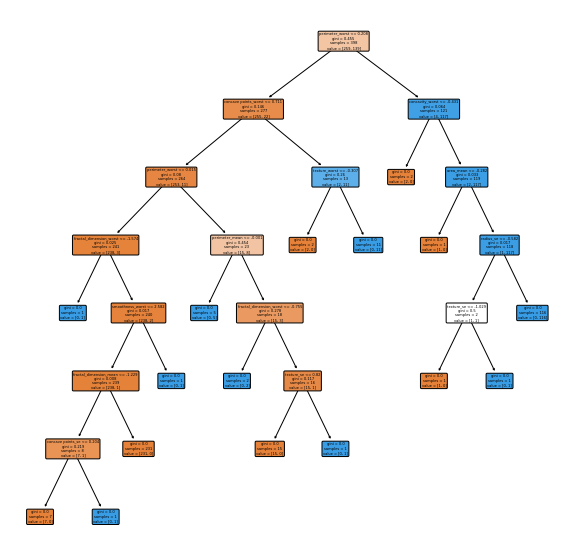

In [385]:
pyplot.figure(figsize=(10,10))
tree.plot_tree(clf, filled=True, rounded=True, feature_names=x.columns)

In [386]:
ds['dt_predicted_result'] = clf.predict(x)

In [387]:
ds

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,predicted_result,dt_predicted_result
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M,M
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M,M
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M,M
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M,M
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M,M
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M,M
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M,M
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M,M


In [388]:
#from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve

classification_report(y_test, dt_pred)

'              precision    recall  f1-score   support\n\n           B       0.88      0.97      0.92        98\n           M       0.95      0.82      0.88        73\n\n    accuracy                           0.91       171\n   macro avg       0.92      0.90      0.90       171\nweighted avg       0.91      0.91      0.91       171\n'

In [389]:
print (classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           B       0.88      0.97      0.92        98
           M       0.95      0.82      0.88        73

    accuracy                           0.91       171
   macro avg       0.92      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171



In [390]:
cm = confusion_matrix(y_test,dt_pred)

In [391]:
cm

array([[95,  3],
       [13, 60]])

Text(0.5, 1.0, 'Confusion Matrix')

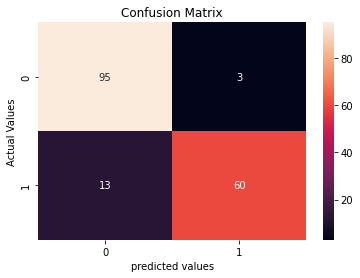

In [392]:
sns.heatmap(cm, annot=True)
plt.xlabel('predicted values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')

In [393]:
clf.score(x_test_scl, y_test)

0.9064327485380117

In [394]:
from sklearn.metrics import plot_roc_curve

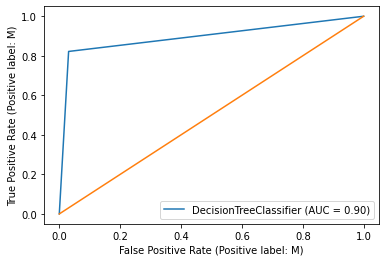

In [395]:
plot_roc_curve(clf, x_test_scl, y_test)
plt.plot([0,1],[0,1])

In [396]:
clf.score(x_test_scl, y_test)

0.9064327485380117

In [399]:
from numpy.ma.core import reshape
tp, fn, tn, fp =  confusion_matrix(y_test, dt_pred).reshape(-1)

In [400]:
Accuracy = (tp+tn)/(tp+fp+tn+fn)

In [401]:
Accuracy

0.631578947368421

# **Opinion**

 Decision tree classifier is the best for this Dataset cause it provide higher accuracy more than K-NN classifier.